In [50]:
import numpy as np
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from utils import *

In [51]:
path_to_data = Path("../data/IXI-T1/")

## Testing adding noise

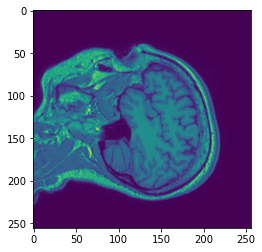

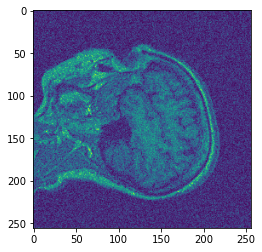

In [52]:
## tests
sample_file = next(path_to_data.iterdir())

nii_img = nib.load(sample_file)
sample_img = nii_img.get_fdata()
plt.imshow(sample_img[:, :, 40])
plt.show()

noisy_sample = add_rice_noise(sample_img)
plt.imshow(noisy_sample[:, :, 40])
plt.show()

In [53]:
from multiprocessing import Pool
NCPU = 8

In [54]:
path_to_datasets = Path("../data")
for path_to_data in path_to_datasets.iterdir():

    print(f"Adding noise to the dataset: {path_to_data.name}")
    if "tiny" in path_to_data.name:
        continue
        
    path_to_save_noisy = Path(f"../noisy/{path_to_data.name}")
    path_to_save_noisy.mkdir(parents=True, exist_ok=True)

    ## Generate a bunch of noisy images
    file_path_gen = path_to_data.iterdir
    params = [{
        "file_path": file_path,
        "path_to_save": path_to_save_noisy
    } for file_path in file_path_gen()]
    
    with Pool(processes=NCPU) as p:
        MAX_COUNT = len([*file_path_gen()])
        
        for res in tqdm_notebook(p.imap(add_noise_and_save, params), total=MAX_COUNT):
            pass
#     for file_path in tqdm_notebook(file_path_gen(), total=len([*file_path_gen()])):
#         nii_img = nib.load(file_path)
#         img_data = nii_img.get_fdata()
#         noisy_img = add_rice_noise(img_data)
#         noisy_nii = nib.Nifti1Image(noisy_img, nii_img.affine, nii_img.header)
#         nib.save(noisy_nii, path_to_save_noisy / file_path.name) # saving as nii saves some space

Adding noise to the dataset: IXI-T1


  0%|          | 0/581 [00:00<?, ?it/s]

Adding noise to the dataset: IXI-PD


  0%|          | 0/578 [00:00<?, ?it/s]

Adding noise to the dataset: IXI-T2


  0%|          | 0/578 [00:00<?, ?it/s]

Adding noise to the dataset: ixi_tiny
